# TIME SERIES FOREACSTING - VAR (VECTOR AUTOREGRESSIVE MODEL - Multivariate Analysis)

# 1. Import libraries

In [1]:
#Open source time-series library
import pmdarima

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [3]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# 2. Import dataset

In [4]:
df = pd.read_csv('Pricing.csv', parse_dates=['Date'], index_col='Date')
print(df.shape)  # (123, 8)
df.tail()
print(df)

(102, 6)
        Iron Ore price index  Limestone price index  Coking Coal price index  \
Date                                                                           
11-Apr                  99.2                   95.4                    100.0   
11-May                  93.7                   90.4                    100.0   
11-Jun                  95.1                   97.1                    100.0   
11-Jul                  95.3                   97.1                    100.0   
11-Aug                  98.4                   97.1                    100.0   
...                      ...                    ...                      ...   
19-May                  89.2                  216.7                    133.9   
19-Jun                  93.7                  223.8                    133.9   
19-Jul                  93.9                  227.0                    133.9   
19-Aug                  92.8                  219.5                    133.9   
19-Sep                  85.1   

# 3. Visualizing Trend

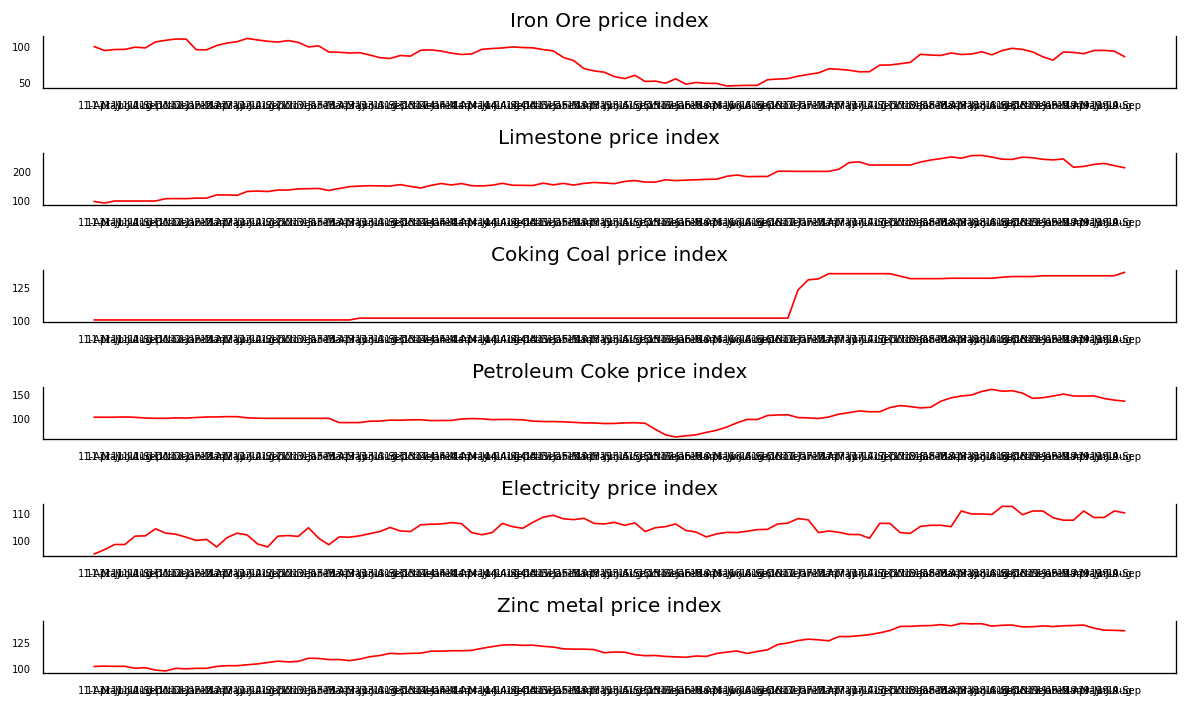

In [5]:
#Visulising Data
# Plot
fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# 4. Scaling

In [6]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['Iron Ore price index','Limestone price index','Coking Coal price index','Petroleum Coke price index','Electricity price index','Zinc metal price index']

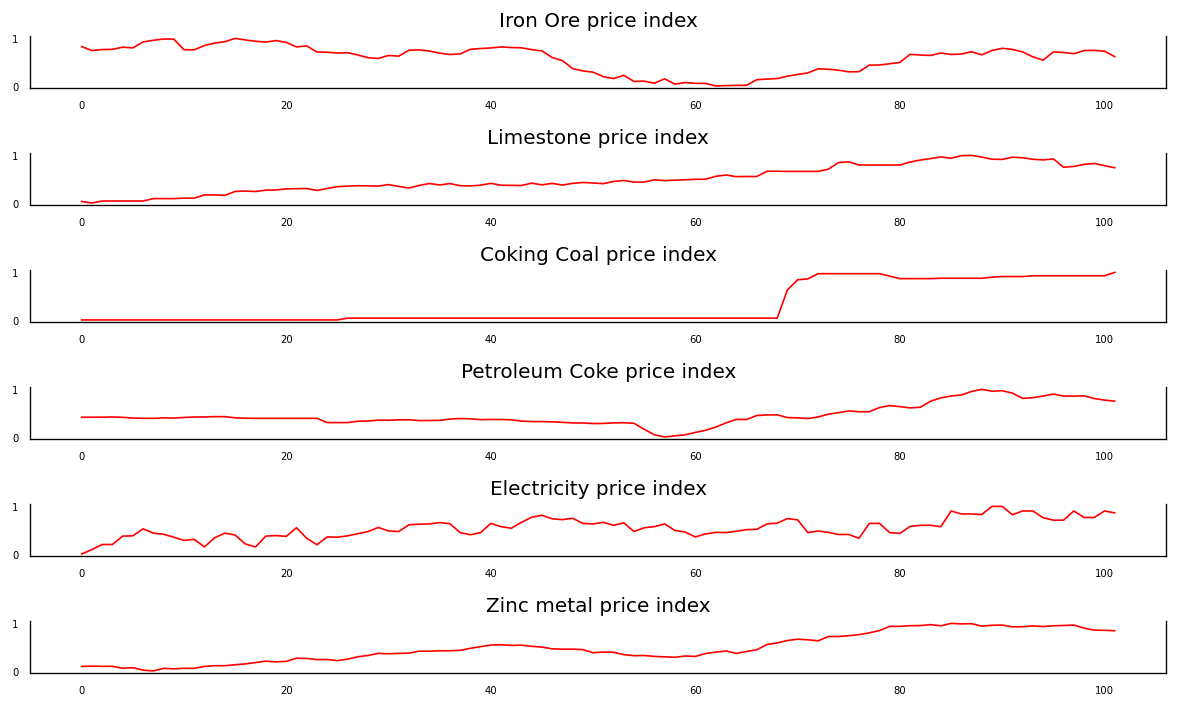

In [7]:
#Visulising Data
# Plot
fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# 5. Granger’s causality tests - 
    Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.1), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
1. tests the null hypothesis that the coefficients of past values in the regression equation is zero.
2. Used to understand if other variables (and their lagged values) are used in forecasing the price of Iron ore (cause and effect of one variable ovre another)
3. The other variable might cause the price of Iron Ore

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
#We have taken maximum lag to be 12
maxlag=12
#Took chi - square as the statistical test, if pvalue >0.1, then the variable doesnot cause Iron ore price
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,Iron Ore price index_x,Limestone price index_x,Coking Coal price index_x,Petroleum Coke price index_x,Electricity price index_x,Zinc metal price index_x
Iron Ore price index_y,1.0000,0.0806,0.1601,0.0628,0.1990,0.0000
Limestone price index_y,0.0109,1.0000,0.0089,0.0001,0.0027,0.0000
Coking Coal price index_y,0.0639,0.0010,1.0000,0.0002,0.2062,0.0029
Petroleum Coke price index_y,0.0010,0.0087,0.0022,1.0000,0.0147,0.0000
Electricity price index_y,0.0029,0.0015,0.0007,0.0003,1.0000,0.0001
Zinc metal price index_y,0.0005,0.0001,0.0071,0.0799,0.0034,1.0000


# 6. Removing columns 'Electricity price index' & 'Cooking Coal' since p > 0.10

In [9]:
df=df.drop(columns =['Electricity price index', 'Coking Coal price index']) 
print(df)

     Iron Ore price index  Limestone price index  Petroleum Coke price index  \
0                0.826866               0.030377                    0.415020   
1                0.744776               0.000000                    0.415020   
2                0.765672               0.040705                    0.415020   
3                0.768657               0.040705                    0.419960   
4                0.814925               0.040705                    0.413043   
..                    ...                    ...                         ...   
97               0.677612               0.767315                    0.858696   
98               0.744776               0.810450                    0.863636   
99               0.747761               0.829891                    0.808300   
100              0.731343               0.784326                    0.774704   
101              0.616418               0.740583                    0.752964   

     Zinc metal price index  
0        

# 7. Applying Cointegration test

In [10]:
#Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.
#COINTEGREATION TEST
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Iron Ore price index ::  39.2      > 40.1749   =>   False
Limestone price index ::  15.69     > 24.2761   =>   False
Petroleum Coke price index ::  6.31      > 12.3212   =>   False
Zinc metal price index ::  0.42      > 4.1296    =>   False


# 8. Train - test split

In [11]:
#SPLITTING THE DATASETS
nobs = 20
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape)

(82, 4)
(20, 4)


# 9. Check for stationary

In [12]:
#Check for stationarity
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
    # ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Iron Ore price index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3017
 No. Lags Chosen       = 2
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.6284. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Limestone price index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.1892
 No. Lags Chosen       = 3
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.9717. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Petroleum Coke price index" 
    ----------------------------

# 10. Order of differencing

In [13]:
# 1st difference
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    
# Second Differencing
df_differenced = df_differenced.diff().dropna()
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Iron Ore price index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4688
 No. Lags Chosen       = 1
 Critical value 1%     = -3.516
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Limestone price index" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.2671
 No. Lags Chosen       = 2
 Critical value 1%     = -3.517
 Critical value 5%     = -2.899
 Critical value 10%    = -2.587
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Petroleum Coke price index" 
    -----------------------------------------------
 Null Hypothesis: Data has

In [14]:
#selecting order of VAR model
model = VAR(df_differenced)

for i in [1,2,3,4,5,6]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Lag Order = 1
AIC :  -24.82909034753921
BIC :  -24.229230131724773
FPE :  1.6487598248949598e-11
HQIC:  -24.588767992311443 

Lag Order = 2
AIC :  -24.961237173191712
BIC :  -23.873525407027287
FPE :  1.4496590384650246e-11
HQIC:  -24.525806173761275 

Lag Order = 3
AIC :  -25.039401003597977
BIC :  -23.456571368060423
FPE :  1.3526856904799425e-11
HQIC:  -24.406283054498022 

Lag Order = 4
AIC :  -24.936661481588306
BIC :  -22.851268492911064
FPE :  1.5258460668126e-11
HQIC:  -24.103237572582284 

Lag Order = 5
AIC :  -25.05870575231007
BIC :  -22.463119065149403
FPE :  1.3926199793749656e-11
HQIC:  -24.022316489712242 

Lag Order = 6
AIC :  -25.123093888800746
BIC :  -22.009492411497813
FPE :  1.3714075751665734e-11
HQIC:  -23.881039978987648 



In [15]:
#Training model of order 4
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, Nov, 2020
Time:                     16:25:46
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -22.8513
Nobs:                     76.0000    HQIC:                  -24.1032
Log likelihood:           584.236    FPE:                1.52585e-11
AIC:                     -24.9367    Det(Omega_mle):     6.80508e-12
--------------------------------------------------------------------
Results for equation Iron Ore price index
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 0.002212         0.008302            0.266           0.790
L1.Iron Ore price index              -0.740263         0.132766           -5.5

In [16]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
   print((col), ':', round(val, 2))

Iron Ore price index : 1.99
Limestone price index : 1.99
Petroleum Coke price index : 1.96
Zinc metal price index : 2.01


In [17]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

4


In [18]:
# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns+'_2d')
df_forecast

,Iron Ore price index_2d,Limestone price index_2d,Petroleum Coke price index_2d,Zinc metal price index_2d
82,-0.089763,-0.053569,0.051683,0.022945
83,0.011988,0.034158,-0.017476,0.013176
84,-0.080824,-0.024604,0.027815,-0.026669
85,0.073576,0.011208,-0.029489,0.003143
86,-0.002720,-0.003282,0.009059,0.000769
87,0.018245,-0.000440,-0.005157,0.011570
88,-0.040271,0.005854,0.013533,-0.001455
89,0.016023,-0.001461,-0.007520,-0.001582
90,-0.003344,-0.001757,0.001164,-0.007910
91,0.015968,-0.003956,-0.005161,0.009208


<Figure size 432x288 with 0 Axes>

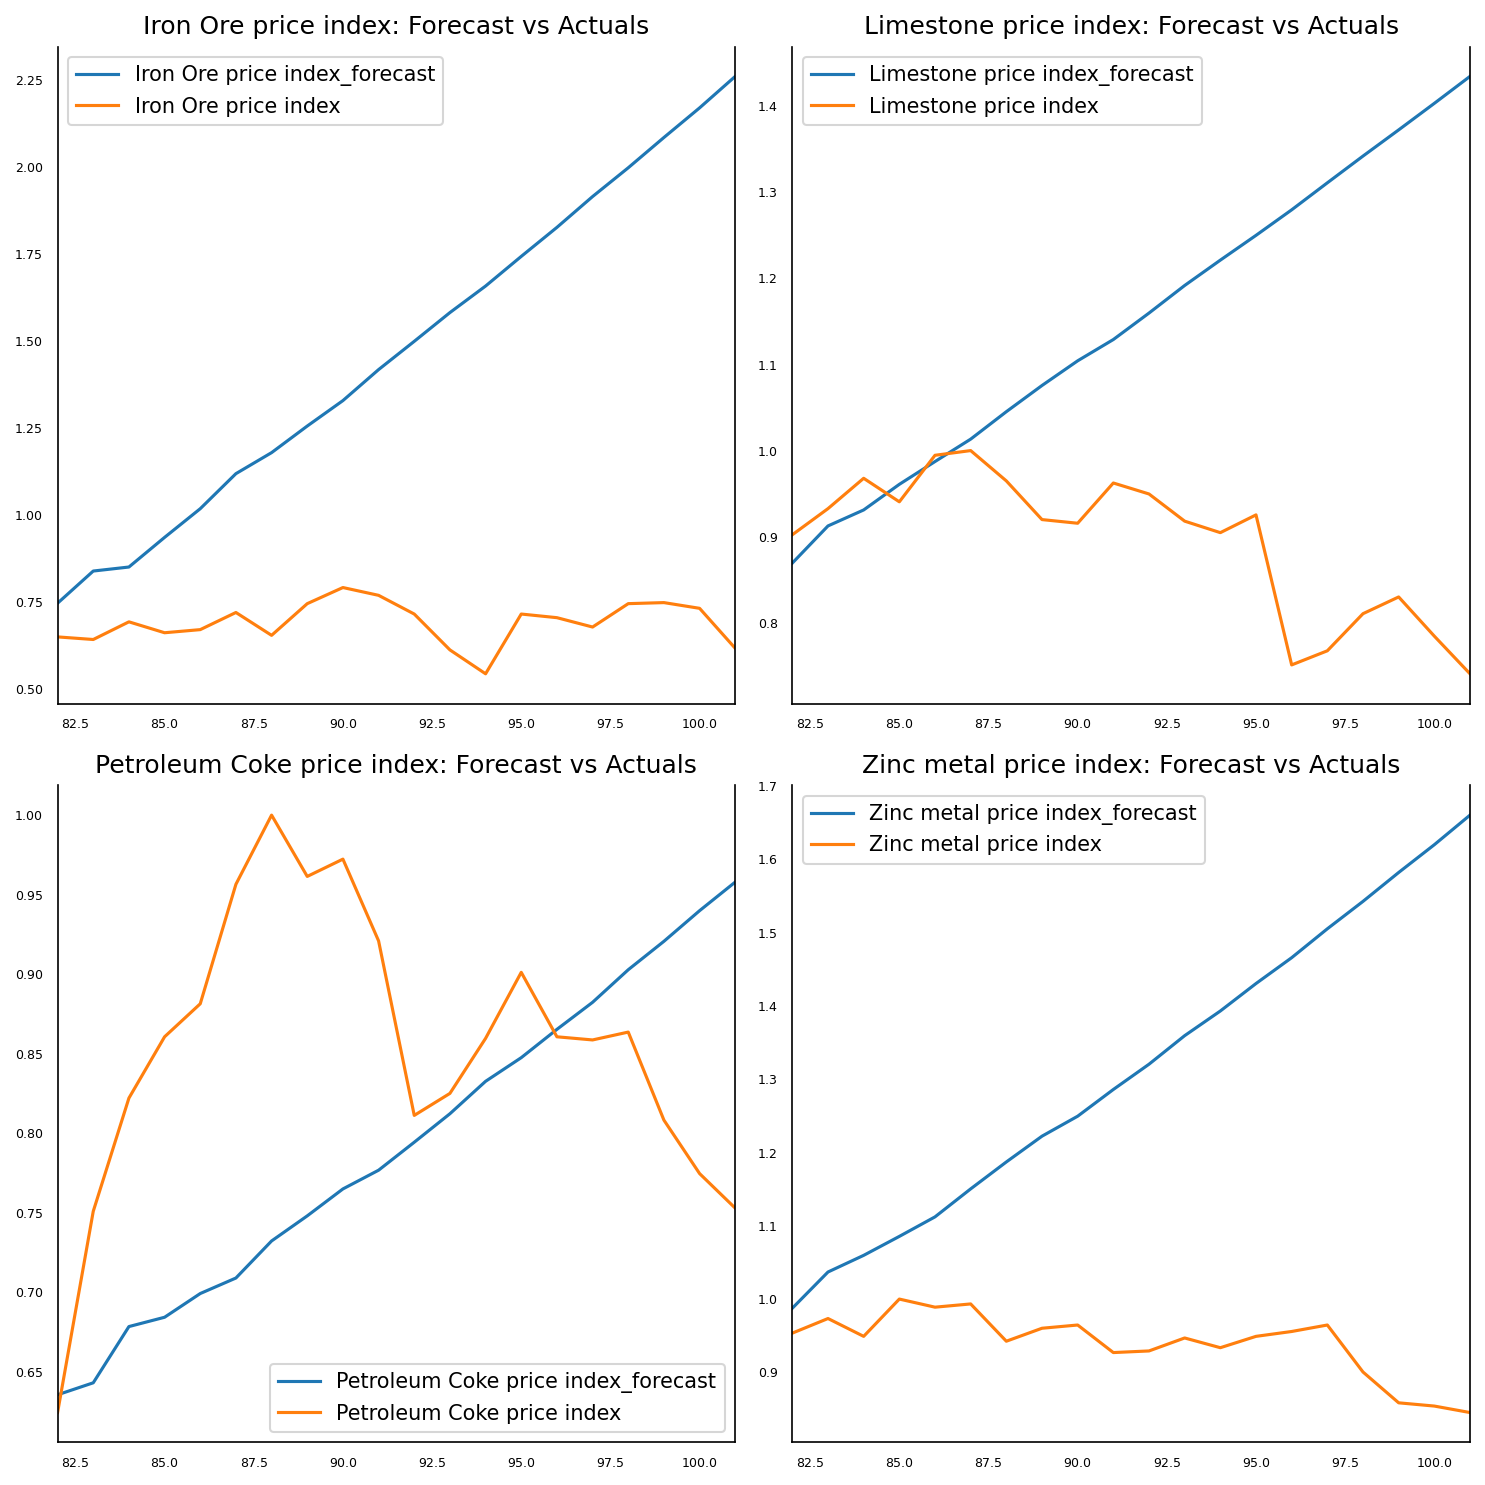

In [19]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    plt.tight_layout();
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Iron Ore price index_forecast','Limestone price index_forecast','Petroleum Coke price index_forecast','Zinc metal price index_forecast']]
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
#fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# 11. Forecasted values

In [20]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Iron Ore price index_forecast']]

,Iron Ore price index_forecast
82,0.746057
83,0.838431
84,0.849980
85,0.935106
86,1.017511
87,1.118162
88,1.178541
89,1.254944
90,1.328002
91,1.417028


<Figure size 432x288 with 0 Axes>

# 12. Performance Evaluation

In [21]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
print('Forecast Accuracy of:Iron Ore Price Index ')
accuracy_prod = forecast_accuracy(df_results['Iron Ore price index_forecast'].values, df_test['Iron Ore price index'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of:Iron Ore Price Index 
mape :  1.143
me :  0.7805
mae :  0.7805
mpe :  1.143
rmse :  0.9062
corr :  0.1078
minmax :  0.4785


<ipython-input-21-1398a602a426>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-21-1398a602a426>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
